# Environment

In [1]:
import pandas as pd
import yaml
import os
import sys
import importlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = "/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_endo"

ENRICHMENT_FILE = f"{BASE_DIR}/cpg_enrichment_parallel.csv"
print(ENRICHMENT_FILE)

OUTPUT_LISTS_PATH = f"{BASE_DIR}/lists"
print(OUTPUT_LISTS_PATH)
os.makedirs(OUTPUT_LISTS_PATH, exist_ok=True)

# Set pandas display options to show all columns without wrapping
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Don't wrap wide DataFrames
pd.set_option('display.max_colwidth', None) # Don't truncate column contents

sys.path.append("/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/code7_cpg_enrichment")
try:
    import functions
    importlib.reload(functions)
    from functions import *
except ModuleNotFoundError:
    print("Warning: Could not import functions module. Make sure functions.py exists in the code7_cpg_enrichment directory.")


/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_endo/cpg_enrichment_parallel.csv
/beegfs/scratch/ric.broccoli/kubacki.michal/SRF_MeCP2_CUTandTAG/iterative_alternative/results/no_dedup/cpg_enrichment/neu_vs_nsc_endo/lists


# Load Data

In [2]:
# Load the CpG enrichment results
cpg_enrichment_df = pd.read_csv(ENRICHMENT_FILE)

In [3]:
# Display first few rows and basic info
print("DataFrame shape:", cpg_enrichment_df.shape)
print("\nFirst few rows:")
display(cpg_enrichment_df.head())
print("\nColumn names:")
print(cpg_enrichment_df.columns.tolist())

DataFrame shape: (12333, 24)

First few rows:


,chr,start,end,neu_signal,nsc_signal,fold_change,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
0,chr1,3671654,3672156,51.041933,13.800820,3.698471,0.1,both,neu_only,False,3,3,"46.80457341624963,64.44004480749791,41.88117982613994","11.392776214324677,14.437202170702175,15.57248052329477",1554,502,CpG:,613,2,0,14.2013;12.1862,NaN,3670786,3672340
1,chr1,4785376,4785814,53.036441,25.444773,2.084375,0.1,both,both,False,3,3,"55.69475568014806,46.275020205128094,57.139546599230684","7.887889002847865,25.311575742503305,43.13485337533006",2211,438,CpG:,621,2,3,23.228;16.7278,12.2007;6.57158;5.01142,4784061,4786272
2,chr1,4807559,4808103,25.618991,16.982276,1.508572,0.4,both,neu_only,False,3,3,"12.560640977196192,36.06808397312357,28.228248375731628","25.20731086263065,12.454278311516127,13.285237970118226",3465,544,CpG:,621,2,1,8.19533;7.28905,3.25084,4805683,4809148
3,chr1,4857465,4858372,194.748292,62.400423,3.120945,0.1,both,both,False,3,3,"150.00289571249357,266.8684021016603,167.37357822828395","62.691283724384924,53.65682884749546,70.85315708396256",2325,907,CpG:,622,2,3,17.1437;26.362,17.8706;16.6995;10.3864,4856462,4858787
4,chr1,5018557,5019711,105.750174,48.390493,2.185350,0.1,both,both,False,3,3,"95.42025330523548,126.10976591456017,95.72050237700806","50.87461018660872,44.81855126447712,49.47831621400381",8467,1154,CpG:,623,2,2,10.3926;16.3863,5.56539;6.07982,5017947,5026414



Column names:
['chr', 'start', 'end', 'neu_signal', 'nsc_signal', 'fold_change', 'pvalue', 'binding_type', 'binding_type_by_peaks', 'significant', 'neu_replicates_with_signal', 'nsc_replicates_with_signal', 'neu_replicate_signals', 'nsc_replicate_signals', 'region_length', 'cpg_length', 'cpg_score', 'cpg_name', 'neu_replicates_with_peaks', 'nsc_replicates_with_peaks', 'neu_peak_scores_by_rep', 'nsc_peak_scores_by_rep', 'region_start', 'region_end']


In [4]:
cpg_enrichment_df = cpg_enrichment_df.rename(columns={'fold_change': 'enrichment'})

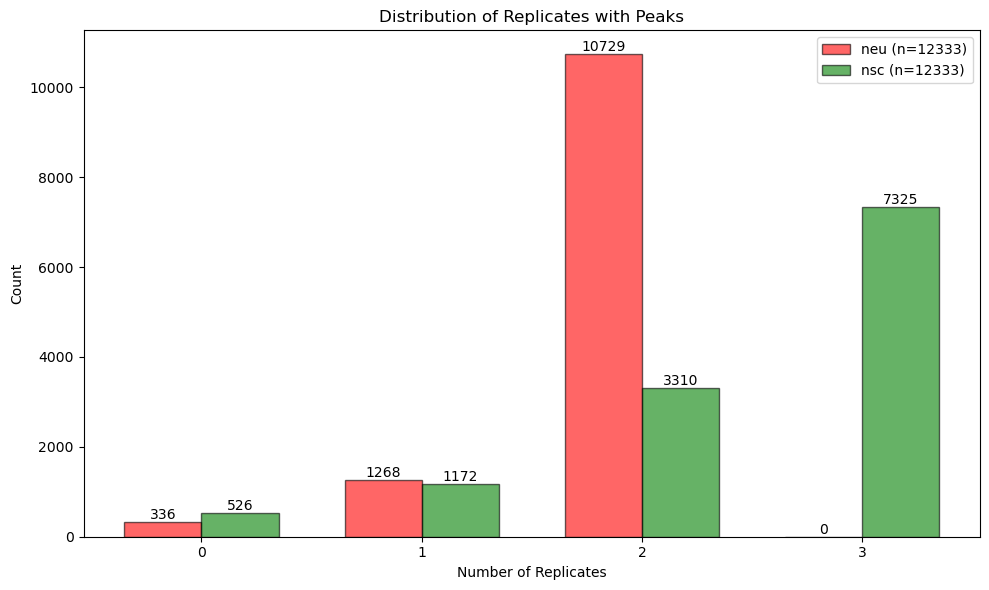

In [5]:
# Create single plot
plt.figure(figsize=(10, 6))

# Get data for plotting
x = np.arange(4)  # 0 through 3 replicates
neu_counts = [len(cpg_enrichment_df[cpg_enrichment_df['neu_replicates_with_peaks'] == i]) for i in range(4)]
nsc_counts = [len(cpg_enrichment_df[cpg_enrichment_df['nsc_replicates_with_peaks'] == i]) for i in range(4)]

# Plot bars side by side
width = 0.35
plt.bar(x - width/2, neu_counts, width, label=f'neu (n={sum(neu_counts)})', color='red', alpha=0.6, edgecolor='black')
plt.bar(x + width/2, nsc_counts, width, label=f'nsc (n={sum(nsc_counts)})', color='green', alpha=0.6, edgecolor='black')

# Add value labels on top of each bar
for i in range(len(x)):
    plt.text(x[i] - width/2, neu_counts[i], str(neu_counts[i]), 
             ha='center', va='bottom')
    plt.text(x[i] + width/2, nsc_counts[i], str(nsc_counts[i]),
             ha='center', va='bottom')

plt.title('Distribution of Replicates with Peaks')
plt.xlabel('Number of Replicates')
plt.ylabel('Count')
plt.xticks(x)
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
# Sort the DataFrame by enrichment value in descending order
cpg_enrichment_df_sorted = cpg_enrichment_df.sort_values(by='enrichment', ascending=False)

# Split data based on binding type

## By signal value

Non zero signal in minumum 2 replicates

In [7]:
# Split data based on binding type
neu_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'neu_only']
nsc_only_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'nsc_only'] 
both_df_by_signal = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_signal)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_signal)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_signal)}")


Number of CpG islands bound by neu only: 70
Number of CpG islands bound by nsc only: 3
Number of CpG islands bound by both: 12260


## By peaks number

Minimum 2 replicates with peaks

In [8]:
# Split data based on binding type
neu_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'neu_only']
nsc_only_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'nsc_only'] 
both_df_by_peaks = cpg_enrichment_df_sorted[cpg_enrichment_df_sorted['binding_type_by_peaks'] == 'both']

# Print sizes of each group
print(f"Number of CpG islands bound by neu only: {len(neu_only_df_by_peaks)}")
print(f"Number of CpG islands bound by nsc only: {len(nsc_only_df_by_peaks)}")
print(f"Number of CpG islands bound by both: {len(both_df_by_peaks)}")


Number of CpG islands bound by neu only: 1698
Number of CpG islands bound by nsc only: 1604
Number of CpG islands bound by both: 9031


# Data analysis

## Both: enrichment distribution

In [9]:
print("Summary statistics of enrichment values selected by signal:")
print(both_df_by_signal['enrichment'].describe())

print("\nSummary statistics of enrichment values selected by peaks:")
print(both_df_by_peaks['enrichment'].describe())

Summary statistics of enrichment values selected by signal:
count    12260.000000
mean         2.253939
std          2.134289
min          0.043433
25%          1.286863
50%          1.858042
75%          2.678248
max         80.797968
Name: enrichment, dtype: float64

Summary statistics of enrichment values selected by peaks:
count    9031.000000
mean        2.308145
std         4.911659
min         0.246485
25%         1.365953
50%         1.938965
75%         2.733512
max       443.719141
Name: enrichment, dtype: float64


== fold change (Neuron/NSC) ==

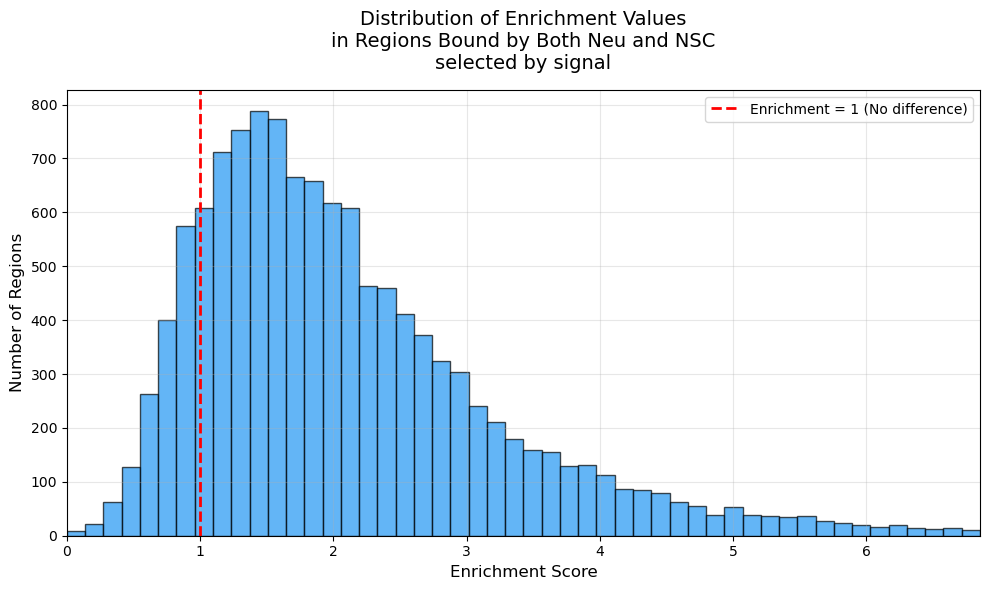

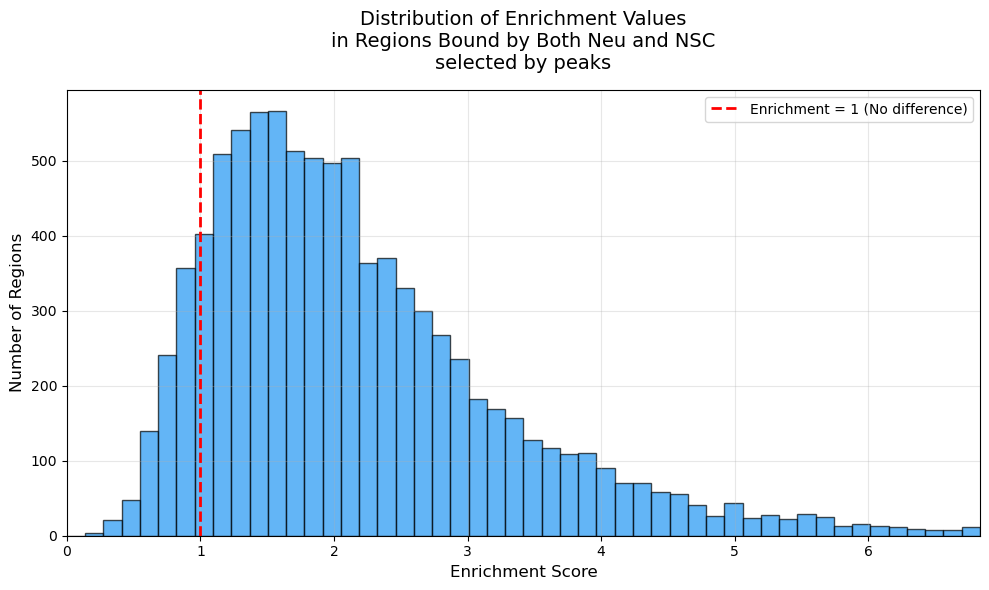

In [10]:
range_min_signal, range_max_signal = plot_enrichment_distribution_neu_vs_nsc(both_df_by_signal, title="selected by signal")
range_min_peaks, range_max_peaks = plot_enrichment_distribution_neu_vs_nsc(both_df_by_peaks, title="selected by peaks")


## Both: enrichment outliers

In [11]:
outliers_df_signal = both_df_by_signal[both_df_by_signal['enrichment'] > range_max_signal].copy()
print(f"\nNumber of outliers selected by signal(enrichment > {range_max_signal}):", len(outliers_df_signal))

outliers_df_peaks = both_df_by_peaks[both_df_by_peaks['enrichment'] > range_max_peaks].copy()
print(f"\nNumber of outliers selected by peaks(enrichment > {range_max_peaks}):", len(outliers_df_peaks))


Number of outliers selected by signal(enrichment > 6.852403047926177): 200

Number of outliers selected by peaks(enrichment > 6.83619116375311): 110


In [12]:
outliers_df_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
11750,chr9,76014906,76015179,44.314909,0.548466,80.797968,0.2,both,neu_only,False,3,2,"39.37015247677551,14.969807732074075,78.60476749257202","1.4283486959096547,0.0,0.21704822025199297",1147,273,CpG:,1164,2,0,2.94576;4.18864,NaN,76014594,76015741
2573,chr12,72303786,72304071,77.377778,0.992233,77.983472,0.1,both,neu_only,False,3,3,"67.27654258474652,77.66787806366642,87.1889141209451","2.472781320163685,0.3270347908414158,0.17688303196122285",2710,285,CpG:,1136,2,0,13.214;8.59304,NaN,72302672,72305382
1383,chr11,16257539,16257942,27.344895,0.406130,67.330427,0.2,both,neu_only,False,3,2,"16.343451713236814,31.280877584698555,34.41035545435597","0.0,0.29515159084422377,0.9232378980361334",3132,403,CpG:,709,2,0,7.35563;7.21373,NaN,16255907,16259039
8428,chr5,24164871,24165339,73.399923,1.515578,48.430332,0.2,both,both,False,3,2,"59.227576477402586,130.56178421482687,30.410408358892955","0.0,4.102136394645594,0.44459621794184984",1106,468,CpG:,769,2,2,7.82216;11.2591,4.17087;4.99153,24164522,24165628
10726,chr8,22013383,22013586,25.962505,0.600152,43.259863,0.2,both,both,False,3,2,"10.948409409580117,45.963368851267646,20.975738182931604","0.25415684907379266,0.0,1.5463000030931597",2672,203,CpG:,752,2,2,11.9989;5.98167,5.19358;3.39434,22011743,22014415


In [13]:
print_outlier_groups(outliers_df_signal, "signal")


First 5 outliers selected by signal:
chr9:76,014,906-76,015,179                        enrichment: 80.79796819575468
chr12:72,303,786-72,304,071                       enrichment: 77.98347216844826
chr11:16,257,539-16,257,942                       enrichment: 67.33042717536686
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787
chr8:22,013,383-22,013,586                        enrichment: 43.259862823170295

Middle 5 outliers selected by signal:
chr2:181,156,705-181,157,058                      enrichment: 9.416057639824372
chr10:75,837,191-75,837,515                       enrichment: 9.36410654382685
chr14:57,825,893-57,826,716                       enrichment: 9.29745195690193
chr7:109,083,076-109,083,440                      enrichment: 9.247525347372752
chr7:80,904,820-80,905,187                        enrichment: 9.22636032636144

Last 5 outliers selected by signal:
chr1:177,983,180-177,984,000                      enrichment: 6.919872274275665
chr9:119

In [14]:
n_rows = len(outliers_df_signal)

print("\nFirst 5 outliers selected by signal:")
for _, row in outliers_df_signal[:5].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

if n_rows > 10:
    mid_start = n_rows//2 - 2
    print("\nMiddle 5 outliers selected by signal:")
    for _, row in outliers_df_signal[mid_start:mid_start+5].iterrows():
        print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")

print("\nLast 5 outliers selected by signal:")
for _, row in outliers_df_signal[-5:].iterrows():
    print(f"{row['chr']}:{row['start']:,}-{row['end']:,}".ljust(50) + f"enrichment: {row['enrichment']}")


First 5 outliers selected by signal:
chr9:76,014,906-76,015,179                        enrichment: 80.79796819575468
chr12:72,303,786-72,304,071                       enrichment: 77.98347216844826
chr11:16,257,539-16,257,942                       enrichment: 67.33042717536686
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787
chr8:22,013,383-22,013,586                        enrichment: 43.259862823170295

Middle 5 outliers selected by signal:
chr2:181,156,705-181,157,058                      enrichment: 9.416057639824372
chr10:75,837,191-75,837,515                       enrichment: 9.36410654382685
chr14:57,825,893-57,826,716                       enrichment: 9.29745195690193
chr7:109,083,076-109,083,440                      enrichment: 9.247525347372752
chr7:80,904,820-80,905,187                        enrichment: 9.22636032636144

Last 5 outliers selected by signal:
chr1:177,983,180-177,984,000                      enrichment: 6.919872274275665
chr9:119

In [15]:
print_outlier_groups(outliers_df_peaks, "peaks")


First 5 outliers selected by peaks:
chr7:12,803,403-12,803,766                        enrichment: 443.7191411587498
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787
chr8:22,013,383-22,013,586                        enrichment: 43.259862823170295
chr17:6,601,615-6,601,899                         enrichment: 37.940334586687406
chr2:34,825,891-34,826,292                        enrichment: 21.84142558084493

Middle 5 outliers selected by peaks:
chr7:126,884,694-126,884,964                      enrichment: 8.635250963608415
chr1:172,325,700-172,326,579                      enrichment: 8.628347535323309
chr8:110,217,678-110,218,128                      enrichment: 8.526370589628337
chr8:27,023,452-27,024,077                        enrichment: 8.514828987724924
chr5:136,198,480-136,199,051                      enrichment: 8.423294885672588

Last 5 outliers selected by peaks:
chr9:106,159,853-106,160,125                      enrichment: 7.077279457795032
chr4:11

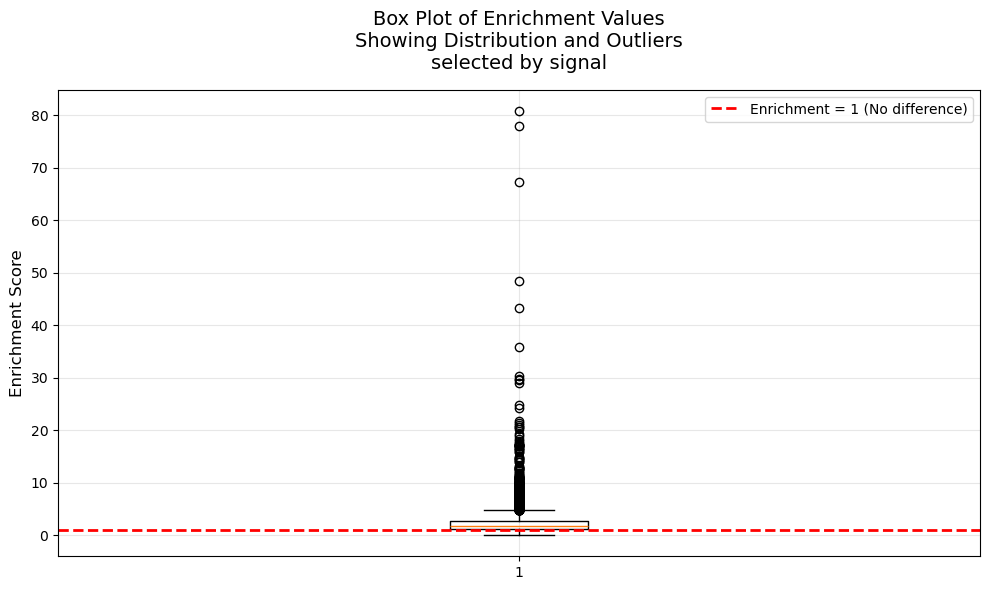

In [16]:
# plot_enrichment_boxplot(both_df_by_peaks, title="selected by peaks")
plot_enrichment_boxplot(both_df_by_signal, title="selected by signal")

In [17]:
outliers_df_signal["nsc_replicates_with_peaks"].value_counts()

signal_nsc_zero_peaks  = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 0]
signal_nsc_one_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 1]
signal_nsc_two_peaks   = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 2]
signal_nsc_three_peaks = outliers_df_signal[outliers_df_signal["nsc_replicates_with_peaks"] == 3]

outliers_df_peaks["nsc_replicates_with_peaks"].value_counts()

peaks_nsc_zero_peaks  = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 0]
peaks_nsc_one_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 1]
peaks_nsc_two_peaks   = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 2]
peaks_nsc_three_peaks = outliers_df_peaks[outliers_df_peaks["nsc_replicates_with_peaks"] == 3]

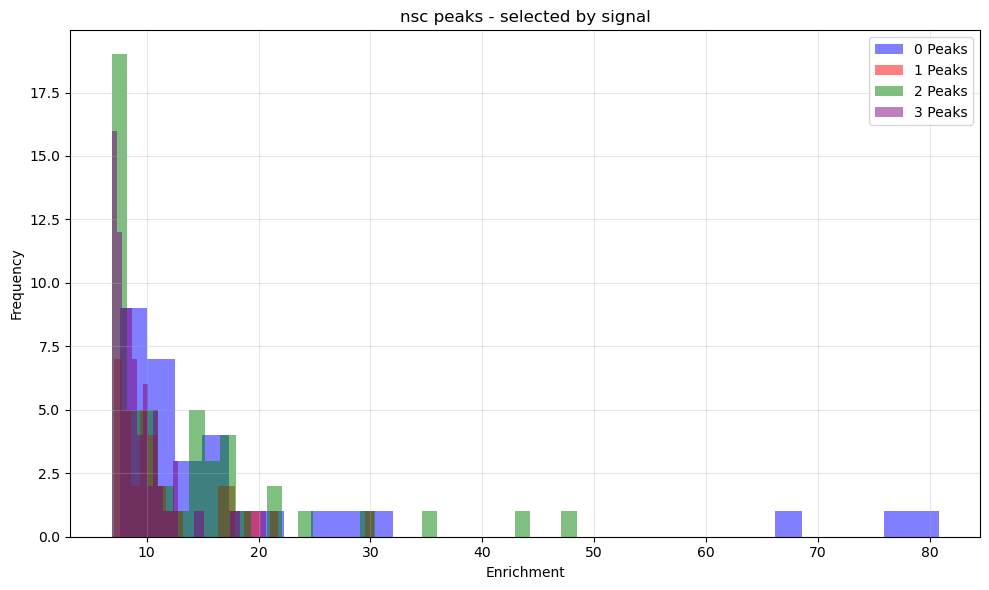

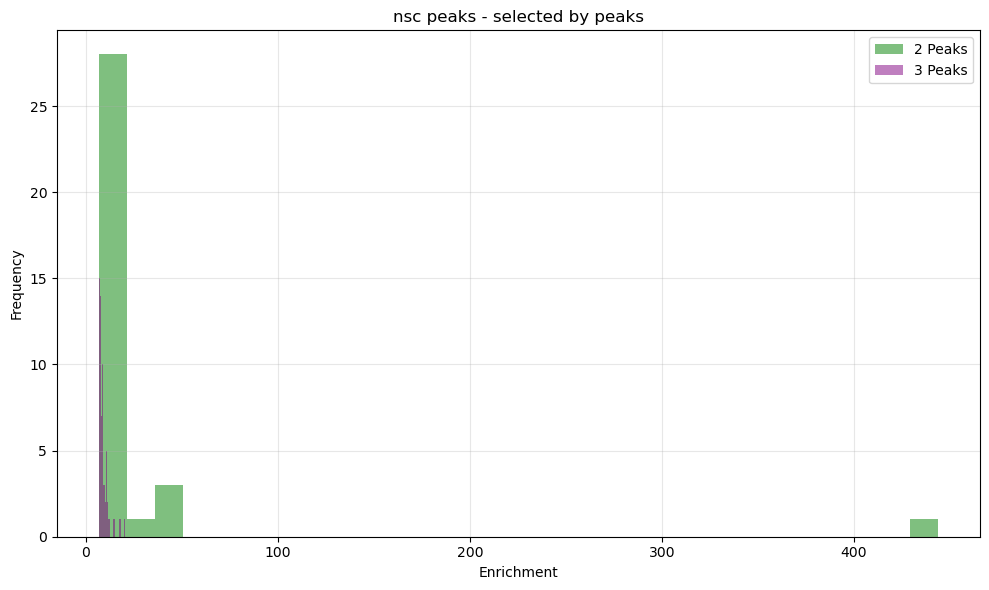

In [18]:
# Classify and plot for signal and peaks outliers
peaks_zero_peaks_signal, peaks_one_peaks_signal, peaks_two_peaks_signal, peaks_three_peaks_signal = plot_by_peaks(outliers_df_signal, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by signal")
peaks_zero_peaks_peaks, peaks_one_peaks_peaks, peaks_two_peaks_peaks, peaks_three_peaks_peaks = plot_by_peaks(outliers_df_peaks, peaks_column='nsc_replicates_with_peaks', title="nsc peaks - selected by peaks")

In [19]:
print_outlier_groups(peaks_two_peaks_peaks, "peaks")


First 5 outliers selected by peaks:
chr7:12,803,403-12,803,766                        enrichment: 443.7191411587498
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787
chr8:22,013,383-22,013,586                        enrichment: 43.259862823170295
chr17:6,601,615-6,601,899                         enrichment: 37.940334586687406
chr2:34,825,891-34,826,292                        enrichment: 21.84142558084493

Middle 5 outliers selected by peaks:
chr11:119,490,996-119,491,996                     enrichment: 9.986181831484776
chr6:128,760,215-128,760,550                      enrichment: 9.975481328318338
chr13:51,594,868-51,595,203                       enrichment: 9.970276073859278
chr17:79,713,371-79,714,228                       enrichment: 8.786319587608707
chr1:172,325,700-172,326,579                      enrichment: 8.628347535323309

Last 5 outliers selected by peaks:
chrX:106,011,556-106,012,093                      enrichment: 7.1750625808011765
chr10:

In [20]:
print_outlier_groups(peaks_two_peaks_signal, "signal")


First 5 outliers selected by signal:
chr5:24,164,871-24,165,339                        enrichment: 48.43033180387787
chr8:22,013,383-22,013,586                        enrichment: 43.259862823170295
chr13:96,132,369-96,132,813                       enrichment: 35.78392741910577
chr16:89,867,462-89,867,681                       enrichment: 29.071078024023123
chr19:4,787,768-4,788,037                         enrichment: 24.16878695359009

Middle 5 outliers selected by signal:
chr4_GL456216_random:33,879-35,465                enrichment: 10.034805400326254
chr11:119,490,996-119,491,996                     enrichment: 9.986181831484776
chr6:128,760,215-128,760,550                      enrichment: 9.975481328318338
chr13:51,594,868-51,595,203                       enrichment: 9.970276073859278
chr7:80,904,820-80,905,187                        enrichment: 9.22636032636144

Last 5 outliers selected by signal:
chr4:153,974,583-153,975,622                      enrichment: 7.147000330668902
chr4

## Regions length distribution

### Region length - defined by the outermost peaks coordinates

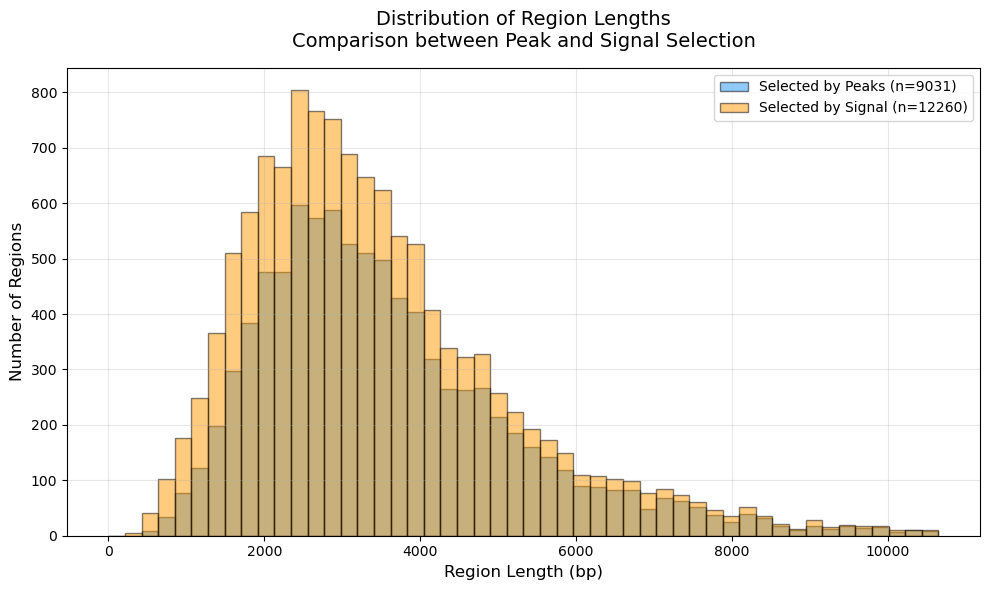

In [21]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='region_length')

In [22]:
both_df_sorted_by_region_length_signal = both_df_by_signal.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_signal.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
8296,chr4,150236643,150237472,47.675792,23.684729,2.012934,0.1,both,both,False,3,3,"37.94593123279767,60.18651302851127,44.894931360781115","32.00876582072813,18.308545432763683,20.73687613113592",19333,829,CpG:,1731,2,3,12.5768;14.1382,15.7933;7.14929;6.87428,150232224,150251557
10145,chr7,45717703,45718318,73.186502,33.712925,2.170874,0.1,both,both,False,3,3,"73.75731885911276,91.58136884385715,54.22081840728452","30.130568605794064,35.65488310846881,35.35332301937675",19242,615,CpG:,933,2,2,15.0251;10.8655,4.89628;11.8479,45700675,45719917
10144,chr7,45714976,45715370,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,394,CpG:,933,2,3,10.6149;10.8322,16.9373;6.68945;11.8479,45700675,45719839
10143,chr7,45713359,45713615,73.403787,33.748239,2.175041,0.1,both,nsc_only,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,256,CpG:,933,1,3,10.8322,6.8612;6.68945;11.8479,45700675,45719839
10141,chr7,45705454,45705704,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,250,CpG:,933,2,3,22.8556;18.961,28.2728;12.7485;11.8479,45700675,45719839


In [23]:
both_df_sorted_by_region_length_peaks = both_df_by_peaks.sort_values(by='region_length', ascending=False)
both_df_sorted_by_region_length_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
8296,chr4,150236643,150237472,47.675792,23.684729,2.012934,0.1,both,both,False,3,3,"37.94593123279767,60.18651302851127,44.894931360781115","32.00876582072813,18.308545432763683,20.73687613113592",19333,829,CpG:,1731,2,3,12.5768;14.1382,15.7933;7.14929;6.87428,150232224,150251557
10145,chr7,45717703,45718318,73.186502,33.712925,2.170874,0.1,both,both,False,3,3,"73.75731885911276,91.58136884385715,54.22081840728452","30.130568605794064,35.65488310846881,35.35332301937675",19242,615,CpG:,933,2,2,15.0251;10.8655,4.89628;11.8479,45700675,45719917
10144,chr7,45714976,45715370,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,394,CpG:,933,2,3,10.6149;10.8322,16.9373;6.68945;11.8479,45700675,45719839
10140,chr7,45704790,45705154,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,364,CpG:,933,2,3,22.8556;18.961,28.2728;12.7485;11.8479,45700675,45719839
10141,chr7,45705454,45705704,73.403787,33.748239,2.175041,0.1,both,both,False,3,3,"73.98585911264585,91.91310823541411,54.31239324723664","30.138211381089384,35.71502853770806,35.39147714133252",19164,250,CpG:,933,2,3,22.8556;18.961,28.2728;12.7485;11.8479,45700675,45719839


In [24]:
print_outlier_groups(both_df_sorted_by_region_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr4:150,236,643-150,237,472                      enrichment: 2.012933802871601
chr7:45,717,703-45,718,318                        enrichment: 2.170873699908756
chr7:45,714,976-45,715,370                        enrichment: 2.1750405057136115
chr7:45,704,790-45,705,154                        enrichment: 2.1750405057136115
chr7:45,705,454-45,705,704                        enrichment: 2.1750405057136115

Middle 5 outliers selected by peaks:
chr11:102,308,956-102,309,471                     enrichment: 2.03318447658612
chr1:180,568,728-180,569,491                      enrichment: 0.717564550463542
chr16:87,495,390-87,496,040                       enrichment: 2.0087349509276087
chr14:21,848,497-21,849,077                       enrichment: 2.88490048651834
chr1:181,143,973-181,144,305                      enrichment: 2.503422091972368

Last 5 outliers selected by peaks:
chr8:19,784,572-19,785,241                        enrichment: 4.6803523294306055
chr18:

In [25]:
print_outlier_groups(both_df_sorted_by_region_length_signal, "signal")


First 5 outliers selected by signal:
chr4:150,236,643-150,237,472                      enrichment: 2.012933802871601
chr7:45,717,703-45,718,318                        enrichment: 2.170873699908756
chr7:45,714,976-45,715,370                        enrichment: 2.1750405057136115
chr7:45,713,359-45,713,615                        enrichment: 2.1750405057136115
chr7:45,705,454-45,705,704                        enrichment: 2.1750405057136115

Middle 5 outliers selected by signal:
chr1:13,589,162-13,590,177                        enrichment: 0.9955446020748232
chr9:21,798,440-21,798,914                        enrichment: 1.1548820864625196
chr17:31,386,279-31,386,642                       enrichment: 1.4371778420012948
chr7:19,272,239-19,272,559                        enrichment: 2.370183891422072
chr11:75,679,121-75,679,708                       enrichment: 0.9860741493144064

Last 5 outliers selected by signal:
chr6:88,198,416-88,199,830                        enrichment: 17.1380592949174


### CpG length - defined by the CpG coordinates

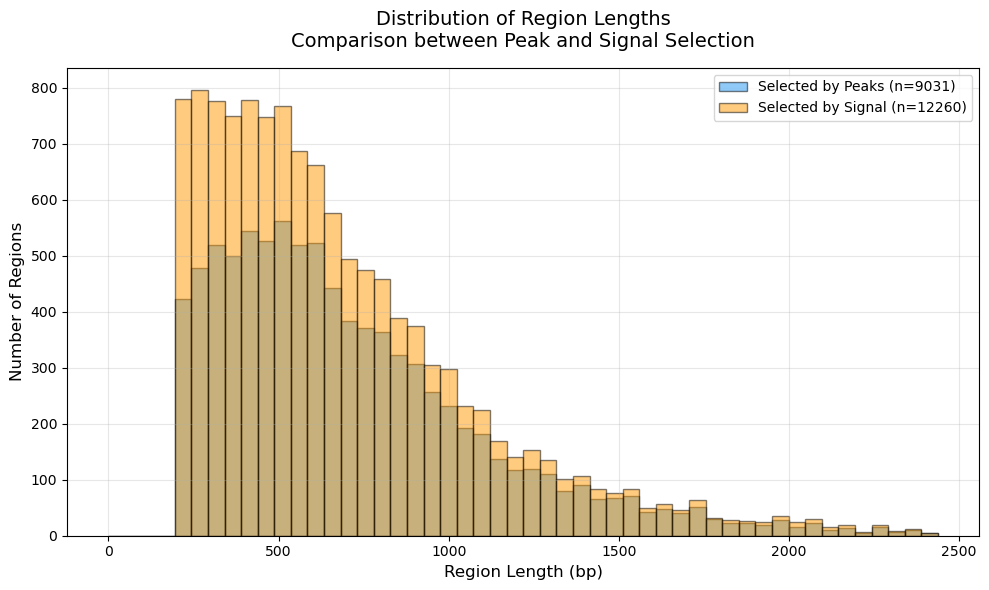

In [26]:
plot_region_length_comparison(both_df_by_peaks, both_df_by_signal, region_length_col='cpg_length')

In [27]:
both_df_sorted_by_cpg_length_peaks = both_df_by_peaks.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_peaks.head()
print_outlier_groups(both_df_sorted_by_cpg_length_peaks, "peaks")


First 5 outliers selected by peaks:
chr8:92,355,697-92,360,826                        enrichment: 1.4406701835396516
chrX:12,086,982-12,092,060                        enrichment: 2.2079998578848623
chrX:12,076,861-12,081,915                        enrichment: 2.0990726858277777
chr17:34,118,396-34,122,981                       enrichment: 5.6957625646668015
chr8:87,958,428-87,962,795                        enrichment: 1.082310454925991

Middle 5 outliers selected by peaks:
chr8:79,711,304-79,711,930                        enrichment: 2.103335172530856
chr4:135,873,511-135,874,137                      enrichment: 1.2639956509070085
chr7:80,198,189-80,198,815                        enrichment: 1.6625856416687756
chr4:21,847,928-21,848,554                        enrichment: 3.866822645731033
chr6:34,780,395-34,781,021                        enrichment: 1.071804245814836

Last 5 outliers selected by peaks:
chr2:36,049,236-36,049,437                        enrichment: 2.005830842885403
chr

In [28]:
both_df_sorted_by_cpg_length_signal = both_df_by_signal.sort_values(by='cpg_length', ascending=False)
both_df_sorted_by_cpg_length_signal.head()
print_outlier_groups(both_df_sorted_by_cpg_length_signal, "signal")


First 5 outliers selected by signal:
chr8:92,355,697-92,360,826                        enrichment: 1.4406701835396516
chr5:33,430,439-33,435,552                        enrichment: 1.2131558331281185
chrX:12,086,982-12,092,060                        enrichment: 2.2079998578848623
chrX:12,076,861-12,081,915                        enrichment: 2.0990726858277777
chr17:34,118,396-34,122,981                       enrichment: 5.6957625646668015

Middle 5 outliers selected by signal:
chr12:81,532,339-81,532,927                       enrichment: 1.6259387515511583
chr16:18,066,321-18,066,909                       enrichment: 0.7547000756224038
chr4:135,494,611-135,495,199                      enrichment: 2.2694118192392856
chrX:38,189,630-38,190,218                        enrichment: 3.918306002370291
chr4:32,950,491-32,951,079                        enrichment: 1.4540722326718505

Last 5 outliers selected by signal:
chr11:101,551,776-101,551,977                     enrichment: 2.8143334319853

# Neu only

In [29]:
neu_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
5290,chr18,20058957,20059346,10.040986,0.000000,inf,1.0,neu_only,neu_only,False,3,0,"21.482726034140818,1.0082978402076102,7.631933355265831","0.0,0.0,0.0",1454,389,CpG:,738,2,0,8.34948;4.35181,NaN,20058438,20059892
1127,chr10,85829330,85829651,10.364149,0.000000,inf,1.0,neu_only,neu_only,False,2,0,"24.9264564813836,0.0,6.165990635559872","0.0,0.0,0.0",541,321,CpG:,1239,2,0,2.77248;3.83416,NaN,85829444,85829985
7506,chr3,143100780,143101147,12.283773,0.000000,inf,1.0,neu_only,neu_only,False,3,0,"8.884292871092331,12.283805027918007,15.683220182061934","0.0,0.0,0.0",1614,367,CpG:,1676,2,1,12.6866;2.93127,3.9381,143100689,143102303
11796,chr9,88599530,88599905,108.602980,0.000000,inf,1.0,neu_only,neu_only,False,3,0,"82.79183908840558,121.3792996965013,121.6378006090273","0.0,0.0,0.0",666,375,CpG:,1260,2,0,10.0472;13.7395,NaN,88599218,88599884
10350,chr7,100582775,100583160,245.606708,0.554498,442.935437,0.5,neu_only,neu_only,False,3,1,"197.77591819361638,232.0464846580907,306.9977223285876","0.0,0.0,1.6634932869359067",475,385,CpG:,1352,2,0,18.0292;18.948,NaN,100582713,100583188


In [30]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = neu_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by peaks, size:", len(neu_only_df_by_peaks))
stats_df

neu only - by peaks, size: 1698


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,1698.000000,1698.000000,1694.000000,1698.000000,1698.000000,1698.000000
mean,33.120666,17.438903,3.654023,2890.768551,609.519435,0.396623
std,26.691338,12.113059,17.148786,1716.815901,423.798631,0.322786
min,1.532964,0.000000,0.080175,381.000000,201.000000,0.100000
25%,17.588860,9.198592,1.213427,1696.250000,322.000000,0.100000
50%,26.246120,14.947164,1.825909,2558.000000,486.000000,0.200000
75%,40.263321,22.827908,2.905056,3625.500000,756.750000,0.700000
max,365.999599,117.969961,442.935437,15834.000000,3388.000000,1.000000


In [31]:
stats_df = neu_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("neu only - by signal, size:", len(neu_only_df_by_signal))
stats_df

neu only - by signal, size: 70


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,70.000000,70.000000,65.000000,70.000000,70.000000,70.000000
mean,23.635622,3.323503,118.458516,1451.200000,556.042857,0.673810
std,32.166330,4.496080,445.361400,729.649004,375.276263,0.233015
min,1.155438,0.000000,0.266212,463.000000,210.000000,0.500000
25%,9.590703,0.424607,3.227119,796.500000,283.250000,0.500000
50%,15.752166,1.869867,7.663422,1386.500000,387.000000,0.500000
75%,27.883563,4.173643,27.301428,1839.750000,725.500000,1.000000
max,245.606708,21.522096,3043.026704,3138.000000,1795.000000,1.000000


In [32]:
print_across_distribution(neu_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr18:20,058,957-20,059,346                       enrichment: inf
chr10:85,829,330-85,829,651                       enrichment: inf
chr3:143,100,780-143,101,147                      enrichment: inf
chr9:88,599,530-88,599,905                        enrichment: inf
chr7:100,582,775-100,583,160                      enrichment: 442.9354365099304

Middle 5 elements selected by peaks:
chr12:84,218,377-84,218,937                       enrichment: 1.829142570849047
chr19:7,056,514-7,057,249                         enrichment: 1.8276349695641376
chr3:107,760,064-107,760,286                      enrichment: 1.827151580796136
chr18:7,692,915-7,693,417                         enrichment: 1.8261175028183825
chr6:41,605,163-41,605,844                        enrichment: 1.8257009033051688

Last 5 elements selected by peaks:
chr2:25,305,080-25,305,422                        enrichment: 0.2142533303325987
chr11:51,650,412-51,651,139                       enrichment:

In [33]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr3:66,973,459-66,973,929                        enrichment: 0.0801751218420677
chr13:55,825,478-55,826,646                       enrichment: 0.0421677569847618
chrX:169,986,832-169,987,780                      enrichment: 0.0

Last 5 elements selected by signal:
chr3:66,973,459-66,973,929                        enrichment: 0.0801751218420677
chr13:55,825,478-55,826,646                       enrichment: 0.0421677569847618
chrX:169,986,832-169,987,780                      enrichment: 0.0


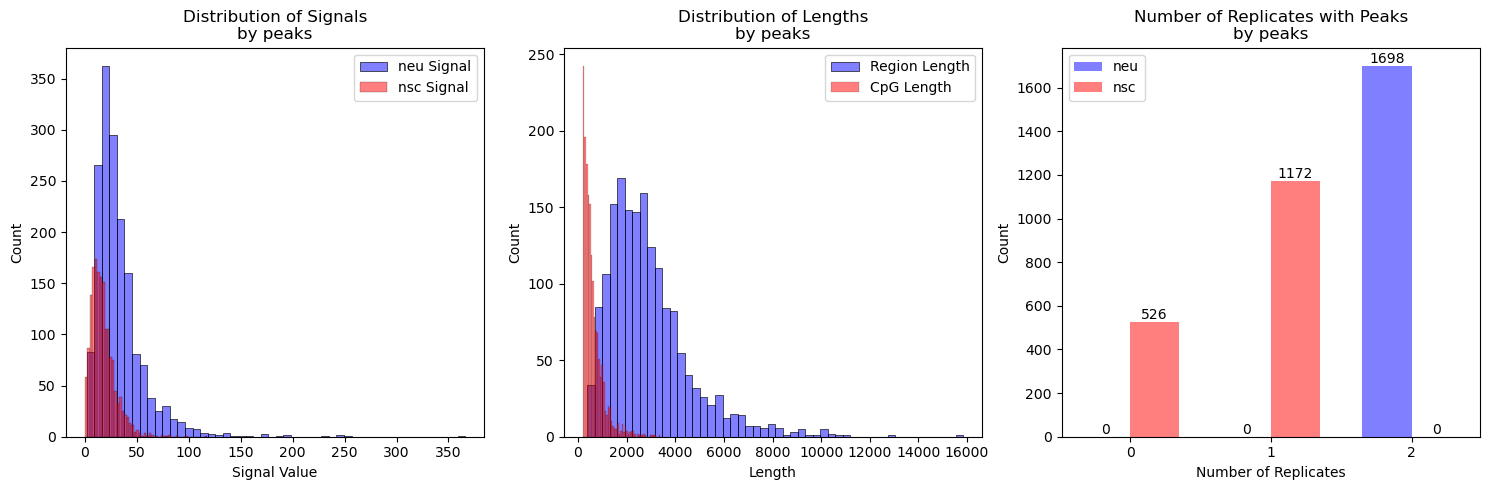

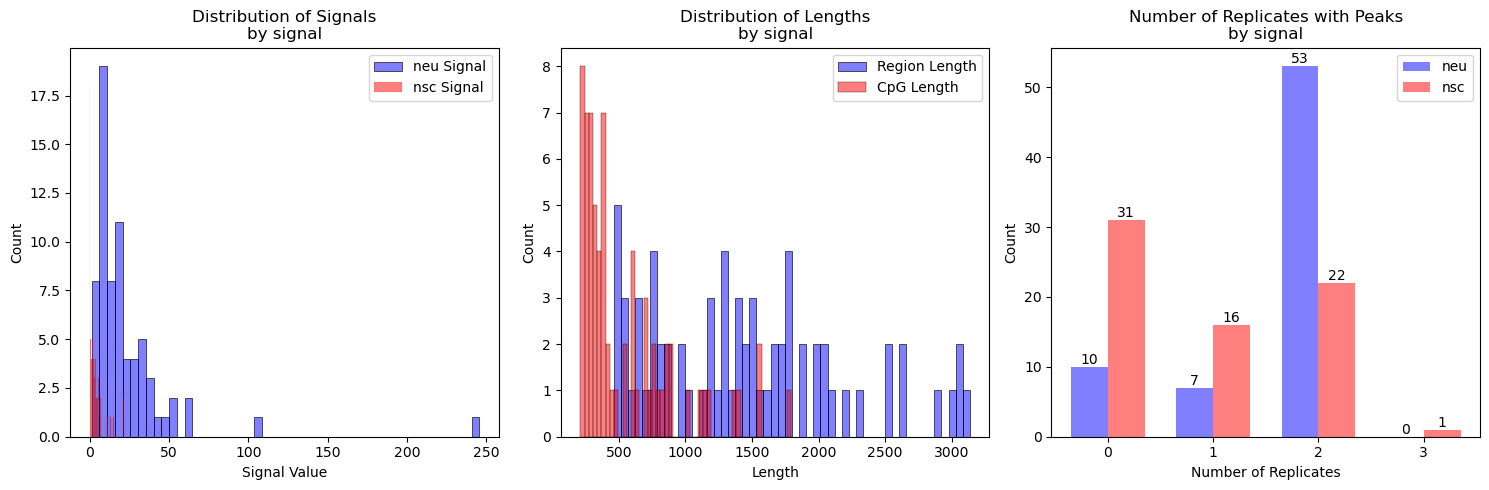

In [34]:
plot_neu_only_distributions(neu_only_df_by_peaks, title="by peaks")
plot_neu_only_distributions(neu_only_df_by_signal, title="by signal")

# NSC only

In [35]:
nsc_only_df_by_peaks.head()

,chr,start,end,neu_signal,nsc_signal,enrichment,pvalue,binding_type,binding_type_by_peaks,significant,neu_replicates_with_signal,nsc_replicates_with_signal,neu_replicate_signals,nsc_replicate_signals,region_length,cpg_length,cpg_score,cpg_name,neu_replicates_with_peaks,nsc_replicates_with_peaks,neu_peak_scores_by_rep,nsc_peak_scores_by_rep,region_start,region_end
6546,chr2,118430867,118431204,4.722866,0.000000,inf,1.0,neu_only,nsc_only,False,3,0,"2.4615263046680624,4.695668338695276,7.01140440854589","0.0,0.0,0.0",807,337,CpG:,1488,0,2,NaN,3.0724;6.19445,118430945,118431752
8222,chr4,140034425,140034657,20.495094,0.006735,3043.026704,0.5,neu_only,nsc_only,False,3,1,"35.188613834425084,13.608487163663918,12.688179579448187","0.0,0.0,0.02020530431294423",1301,232,CpG:,1653,1,2,12.1323,5.61033;3.11511,140034373,140035674
93,chr1,37875331,37875824,13.078606,0.006885,1899.625849,0.5,neu_only,nsc_only,False,3,1,"10.308551995285795,23.44580811978785,5.481458635973441","0.0,0.020654498237319005,0.0",1705,493,CpG:,873,1,2,4.20458,3.25313;5.92257,37874909,37876614
3018,chr13,46771211,46771472,8.922198,0.038052,234.473046,0.5,neu_only,nsc_only,False,3,1,"18.299656367941992,2.501535607664377,5.965402159114812","0.0,0.0,0.11415637979571451",1192,261,CpG:,941,0,2,NaN,7.00682;5.83284,46771182,46772374
3229,chr13,96132369,96132813,29.974148,0.837643,35.783927,0.2,both,nsc_only,False,3,2,"25.12817334548455,36.28998886015546,28.5042804162836","0.0,2.2620073631859214,0.2509209011921293",986,444,CpG:,1318,0,2,NaN,3.92304;7.55902,96132334,96133320


In [36]:
# Generate summary statistics for numeric columns, ignoring inf values
# Replace inf values with NaN before calculating statistics
numeric_cols = ['neu_signal', 'nsc_signal', 'enrichment', 'region_length', 'cpg_length', 'pvalue']

stats_df = nsc_only_df_by_peaks[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by peaks, size:", len(nsc_only_df_by_peaks))
stats_df

nsc only - by peaks, size: 1604


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,1604.000000,1604.000000,1603.000000,1604.000000,1604.000000,1604.000000
mean,32.006356,20.192408,5.176827,3151.276185,594.756858,0.465420
std,39.576432,15.302870,89.718014,1882.479864,416.180367,0.333765
min,0.000000,0.000000,0.000000,277.000000,201.000000,0.100000
25%,15.634556,11.137062,0.974979,1850.000000,306.750000,0.100000
50%,23.737060,17.442864,1.461728,2708.500000,475.000000,0.400000
75%,36.899267,25.327028,2.167175,3957.500000,733.250000,0.700000
max,989.014450,325.121711,3043.026704,19164.000000,5113.000000,1.000000


In [37]:
stats_df = nsc_only_df_by_signal[numeric_cols].replace([np.inf, -np.inf], np.nan).describe()
print("nsc only - by signal, size:", len(nsc_only_df_by_signal))
stats_df

nsc only - by signal, size: 3


,neu_signal,nsc_signal,enrichment,region_length,cpg_length,pvalue
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,0.830134,11.741759,0.040781,713.000000,862.000000,0.888889
std,1.163574,13.671906,0.040106,213.501756,356.858515,0.192450
min,0.000000,0.450106,0.000000,500.000000,470.000000,0.666667
25%,0.165145,4.141427,0.021084,606.000000,709.000000,0.833333
50%,0.330289,7.832748,0.042168,712.000000,948.000000,1.000000
75%,1.245201,17.387586,0.061171,819.500000,1058.000000,1.000000
max,2.160112,26.942424,0.080175,927.000000,1168.000000,1.000000


In [38]:
print_across_distribution(nsc_only_df_by_peaks, selection_type="peaks")


First 5 elements selected by peaks:
chr2:118,430,867-118,431,204                      enrichment: inf
chr4:140,034,425-140,034,657                      enrichment: 3043.026703544749
chr1:37,875,331-37,875,824                        enrichment: 1899.625849063471
chr13:46,771,211-46,771,472                       enrichment: 234.4730463826956
chr13:96,132,369-96,132,813                       enrichment: 35.78392741910577

Middle 5 elements selected by peaks:
chr5:136,919,192-136,919,482                      enrichment: 1.4673455636754025
chr9:66,220,618-66,220,866                        enrichment: 1.4639015291248052
chr7:37,769,500-37,772,351                        enrichment: 1.4617277829643034
chr7:102,249,755-102,250,036                      enrichment: 1.4615873644453163
chr10:61,625,499-61,626,247                       enrichment: 1.4610975546028906

Last 5 elements selected by peaks:
chr10:22,148,532-22,151,691                       enrichment: 0.0552580315391301
chr10:22,158,441-

In [39]:
print_across_distribution(nsc_only_df_by_signal, selection_type="signal")


First 5 elements selected by signal:
chr3:66,973,459-66,973,929                        enrichment: 0.0801751218420677
chr13:55,825,478-55,826,646                       enrichment: 0.0421677569847618
chrX:169,986,832-169,987,780                      enrichment: 0.0

Last 5 elements selected by signal:
chr3:66,973,459-66,973,929                        enrichment: 0.0801751218420677
chr13:55,825,478-55,826,646                       enrichment: 0.0421677569847618
chrX:169,986,832-169,987,780                      enrichment: 0.0


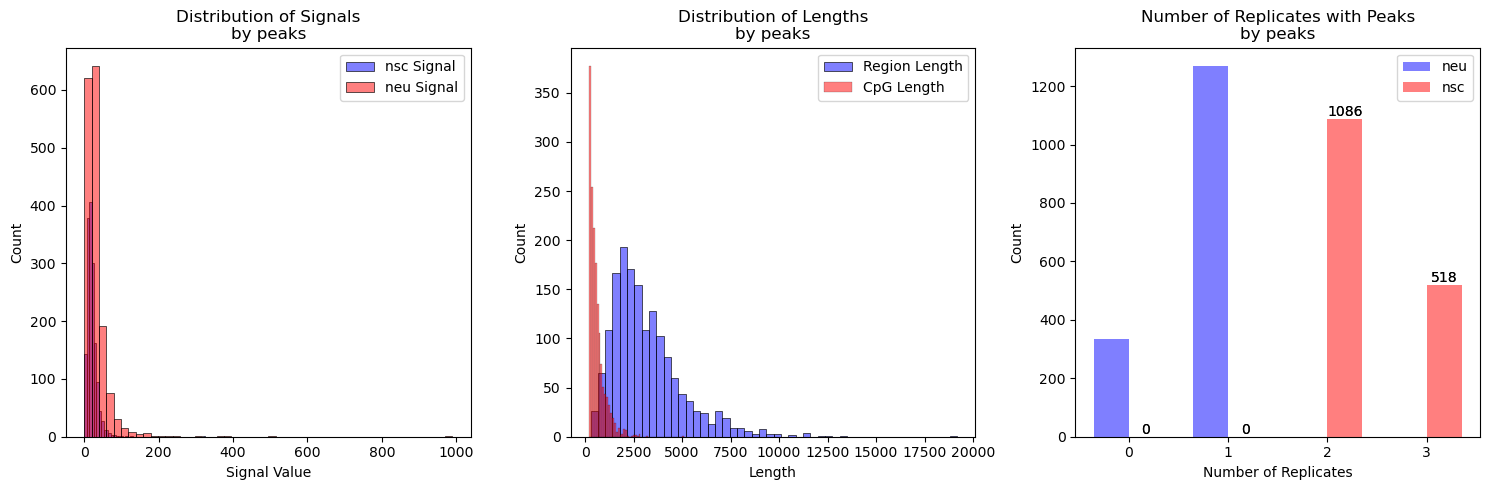

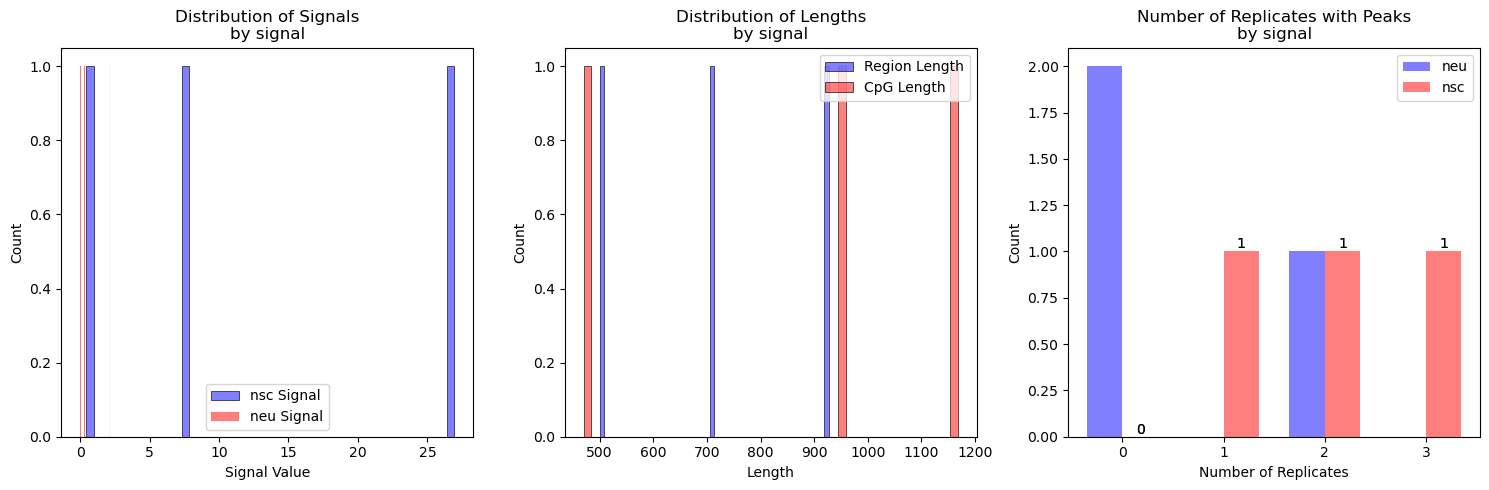

In [40]:
plot_nsc_only_distributions(nsc_only_df_by_peaks, title="by peaks")
plot_nsc_only_distributions(nsc_only_df_by_signal, title="by signal")

# Create output files

## UP in Neu

In [41]:
up_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_signal_1_5 = both_df_by_signal[(both_df_by_signal['enrichment'] > 1.5) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()    
up_enriched_signal_2 = both_df_by_signal[(both_df_by_signal['enrichment'] > 2) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
up_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
up_enriched_peaks_1_5 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 1.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()    
up_enriched_peaks_2 = both_df_by_peaks[(both_df_by_peaks['enrichment'] > 2) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [42]:
print("up_enriched_signal_1.shape:",   up_enriched_signal_1.shape)
print("up_enriched_signal_1_5.shape:", up_enriched_signal_1_5.shape)
print("up_enriched_signal_2.shape:",   up_enriched_signal_2.shape)
print("up_enriched_peaks_1.shape:",    up_enriched_peaks_1.shape)
print("up_enriched_peaks_1_5.shape:",  up_enriched_peaks_1_5.shape)
print("up_enriched_peaks_2.shape:",    up_enriched_peaks_2.shape)

up_enriched_signal_1.shape: (10423, 24)
up_enriched_signal_1_5.shape: (7796, 24)
up_enriched_signal_2.shape: (5270, 24)
up_enriched_peaks_1.shape: (7989, 24)
up_enriched_peaks_1_5.shape: (6110, 24)
up_enriched_peaks_2.shape: (4196, 24)


## UP in NSC

In [43]:
down_enriched_signal_1 = both_df_by_signal[(both_df_by_signal['enrichment'] < 1.0 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_08 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.8 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_signal_05 = both_df_by_signal[(both_df_by_signal['enrichment'] < 0.5 ) & (both_df_by_signal['enrichment'] < range_max_signal)].copy()
down_enriched_peaks_1 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 1.0) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_08 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.8) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()
down_enriched_peaks_05 = both_df_by_peaks[(both_df_by_peaks['enrichment'] < 0.5) & (both_df_by_peaks['enrichment'] < range_max_peaks)].copy()

In [44]:
print("down_enriched_signal_1.shape:",  down_enriched_signal_1.shape)
print("down_enriched_signal_08.shape:", down_enriched_signal_08.shape)
print("down_enriched_signal_05.shape:", down_enriched_signal_05.shape)
print("down_enriched_peaks_1.shape:",   down_enriched_peaks_1.shape)
print("down_enriched_peaks_08.shape:",  down_enriched_peaks_08.shape)
print("down_enriched_peaks_05.shape:",  down_enriched_peaks_05.shape)

down_enriched_signal_1.shape: (1637, 24)
down_enriched_signal_08.shape: (810, 24)
down_enriched_signal_05.shape: (162, 24)
down_enriched_peaks_1.shape: (932, 24)
down_enriched_peaks_08.shape: (415, 24)
down_enriched_peaks_05.shape: (48, 24)


## Save output files

In [45]:
up_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1.csv', index=False)
up_enriched_signal_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_1_5.csv', index=False)
up_enriched_signal_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_signal_2.csv', index=False)
up_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1.csv', index=False)
up_enriched_peaks_1_5.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_1_5.csv', index=False)
up_enriched_peaks_2.to_csv(f'{OUTPUT_LISTS_PATH}/up_enriched_peaks_2.csv', index=False)

down_enriched_signal_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_1.csv', index=False)
down_enriched_signal_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_08.csv', index=False)
down_enriched_signal_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_signal_05.csv', index=False)
down_enriched_peaks_1.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_1.csv', index=False)
down_enriched_peaks_08.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_08.csv', index=False)
down_enriched_peaks_05.to_csv(f'{OUTPUT_LISTS_PATH}/down_enriched_peaks_05.csv', index=False)

neu_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_signal.csv', index=False)
nsc_only_df_by_signal.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_signal.csv', index=False)
neu_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/neu_only_df_by_peaks.csv', index=False)
nsc_only_df_by_peaks.to_csv(f'{OUTPUT_LISTS_PATH}/nsc_only_df_by_peaks.csv', index=False)